In [2]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np
import random
import csv
import pandas as pd
import matplotlib


In [3]:
# wooeeper
a_start = 2.515456864170004
e_start = 0.1703818276460499
omega_start = 3.5644092404577585


In [5]:

sim = rebound.Simulation()

# add sun
sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .1

starting_a = 0.
starting_e = 0.
final_a = 0.
final_e = 0.

mass = 1e-29
radius = a_start
omega = omega_start
ecc = e_start
    
# sun
sim.add(m=0.9999999999950272, x=-0.008669035216216899, y=0.0031140563797133693, z=0.00017700903203290386, vx=-0.00017842972567085554, vy=-0.0004942109647718484, vz=8.170411607613112e-06)
# jupiter
sim.add(m=0.0009547919099366768, x=4.717393707823112, y=-1.58629315260585, z=-0.0989587433278056, vx=0.13456873359546767, vy=0.4363713717691052, vz=-0.004821057409397645)
# mars
sim.add(m=3.2271560828978514e-07, x=-0.5195763051075928, y=-1.4079912951728626, z=-0.016864026009610615, vx=0.7953007114278168, vy=-0.2075756016137399, vz=-0.023844826829689417)
# add astroid
sim.add(m=mass,a=radius,omega=omega, e=ecc)



In [132]:
cnt = 0
while True:
    sim.step()
    if (sim.particles[3].e>1):
        print(cnt/10)
        break
    cnt +=1

682434.4


In [6]:

# # # # first part (progress not saved)
# #years = 300000+138000
# years = 600000
# for i in range (int(years*(1/sim.dt))):
#     sim.step()
    

# yeet part
years = 700000
#years = 200000

a_list = []
time_list = []
e_list = []

jupiter_distance_list = []
mars_distance_list = []

save_rate = 1000

print_shit = int(years*(1/sim.dt)/save_rate)
print(print_shit)

for j in range (save_rate):
    clear_output(wait=True)
    print(j/(save_rate))
    for i in range (int(years*(1/sim.dt)/save_rate)):
                    
        sim.step()
        # second part
        a_list.append(sim.particles[3].a)
        e_list.append(sim.particles[3].e)
        time_list.append(((j*print_shit)+i)/10)

        jupiter_distance_list.append(np.sqrt((sim.particles[1].x-sim.particles[3].x)**2+(sim.particles[1].y-sim.particles[3].y)**2+(sim.particles[1].z-sim.particles[3].z)**2))
        mars_distance_list.append(np.sqrt((sim.particles[2].x-sim.particles[3].x)**2+(sim.particles[2].y-sim.particles[3].y)**2+(sim.particles[2].z-sim.particles[3].z)**2))

        
    #fig = rebound.OrbitPlot(sim)
    #plt.savefig('animate_save/plot_{}.png'.format(j))

        


0.741


In [330]:
years = 10
start_yr = max(time_list)
for i in range (years*10):
    sim.step()
    a_list.append(sim.particles[3].a)
    e_list.append(sim.particles[3].e)
    time_list.append(start_yr+((i)/10))

    jupiter_distance_list.append(np.sqrt((sim.particles[1].x-sim.particles[3].x)**2+(sim.particles[1].y-sim.particles[3].y)**2+(sim.particles[1].z-sim.particles[3].z)**2))
    mars_distance_list.append(np.sqrt((sim.particles[2].x-sim.particles[3].x)**2+(sim.particles[2].y-sim.particles[3].y)**2+(sim.particles[2].z-sim.particles[3].z)**2))


In [269]:
sim.step()

1.0083022576616405


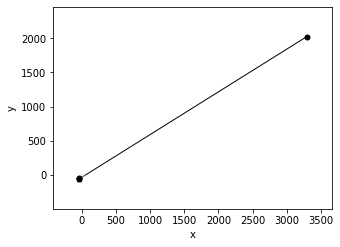

In [334]:

fig = rebound.OrbitPlot(sim)
#plt.xlabel("AU")
print(sim.particles[3].e)


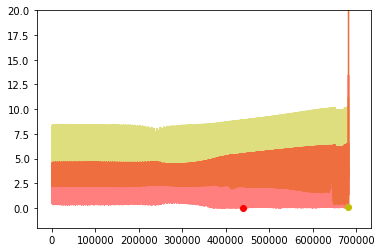

closed distance to mars: 0.003850787421730898
closed distance to jupiter: 0.06796902591760114
682286


In [7]:

mars_min_dist = min(mars_distance_list)
mars_index = int(mars_distance_list.index(mars_min_dist)/10.)

jupiter_min_dist = min(jupiter_distance_list)
jupiter_index = int(jupiter_distance_list.index(jupiter_min_dist)/10.)

plt.plot(time_list,jupiter_distance_list,"y",alpha = 0.5)
plt.plot(time_list,mars_distance_list,"r",alpha = 0.5)

plt.plot(mars_index,mars_min_dist,"ro")
plt.plot(jupiter_index,jupiter_min_dist,"yo")

#plt.xlim(0,0.8e6)
plt.ylim([-2,20])
plt.show()
print("closed distance to mars:",min(mars_distance_list))
print("closed distance to jupiter:",min(jupiter_distance_list))

print(jupiter_index)



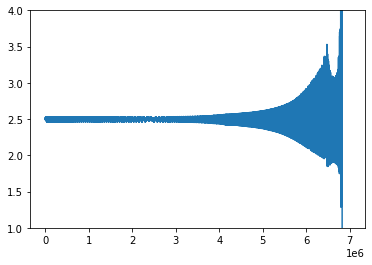

In [6]:
plt.plot(time_list,a_list)
plt.ylim(1,4)
plt.show()

In [9]:
sim.status()

---------------------------------
REBOUND version:     	3.19.1
REBOUND built on:    	Jan 14 2022 11:24:53
Number of particles: 	4
Selected integrator: 	whfast
Simulation time:     	7.0000000007747719e+05
Current timestep:    	0.100000
---------------------------------
<rebound.particle.Particle object at 0x7f4dc6b3ba40, m=0.9999999999950272 x=-34.75241437818335 y=-54.28540182680149 z=2.489408493952846 vx=-0.00046312424474244233 vy=-8.807753161140079e-05 vz=1.2859929594740231e-05>
<rebound.particle.Particle object at 0x7f4dc6b3bcc0, m=0.0009547919099366768 x=-34.868106786314954 y=-59.541982389447845 z=2.5138029833391777 vx=0.43329502124597424 vy=0.010840006054976212 vz=-0.009739194923084414>
<rebound.particle.Particle object at 0x7f4dc6b3ba40, m=3.2271560828978514e-07 x=-34.3338801767378 y=-52.96200082360311 z=2.4803876332161168 vx=-0.8374799274037358 vy=0.28967982915477425 vz=-0.004385182127541979>
<rebound.particle.Particle object at 0x7f4dc6b3bcc0, m=1e-29 x=3295.5131252298133 y=2024

In [8]:
# gravitational force calculator

def F_mars(r):
    G = 6.67408e-11
    M = (3.2271560828978514e-07)*(1.989e30)
    mass = (1e-29)*(1.989e30)

    return ((G*M*mass)/((r*1.496e11)**2))


def F_jupiter(r):
    G = 6.67408e-11
    M = (0.0009547919099366768)*(1.989e30)
    mass = (1e-29)*(1.989e30)
    return ((G*M*mass)/((r*1.496e11)**2))


g_force_list_jupiter = []
g_force_list_mars = []
for i in range (len(time_list)):
    g_force_list_jupiter.append(F_jupiter(jupiter_distance_list[i]))
    g_force_list_mars.append(F_mars(mars_distance_list[i]))



In [1]:


print("jupiter")
print("max force: ",max(g_force_list_jupiter))
print("time: ",g_force_list_jupiter.index(max(g_force_list_jupiter)))
print("mars")
print("max force: ",max(g_force_list_mars))
print("time: ",g_force_list_mars.index(max(g_force_list_mars)))

fig, ax1 = plt.subplots()
fig.set_size_inches(10, 7)


color = 'tab:red'
ax1.set_xlabel('Time (Million years)')
ax1.set_ylabel('Force (N)', color=color)
ax1.plot(time_list, g_force_list_jupiter, color="y",alpha = 0.5,label="force by Jupiter")
ax1.plot(time_list, g_force_list_mars, color="r",alpha = 0.5,label="force by Mars")
ax1.tick_params(axis='y', labelcolor=color)
ax1.legend(loc='upper center')
ax1.set_xlim(0,0.7e6)
#ax1.set_ylim(0)
ax1.semilogy()
ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('eccentricity', color=color)  # we already handled the x-label with ax1
ax2.plot(time_list, e_list, color=color,alpha = 0.5,label="eccentricity of the asteroid")
ax2.tick_params(axis='y', labelcolor=color)
#ax2.set_ylim(0.2,0.8)

ax2.legend(loc='best', bbox_to_anchor=(0.5, 0., 0.5, 0.5))
ax1.set_title('effect of gravity on the semi-major axis')

scale_x = 1e6
ticks_x = matplotlib.ticker.FuncFormatter(lambda time_list, pos: '{0:g}'.format(time_list/scale_x))
ax2.xaxis.set_major_formatter(ticks_x)


fig.tight_layout()  # otherwise the right y-label is slightly clipped
#plt.xlim(0.025e6,0.075e6)
plt.legend()
plt.show()




jupiter


NameError: name 'g_force_list_jupiter' is not defined

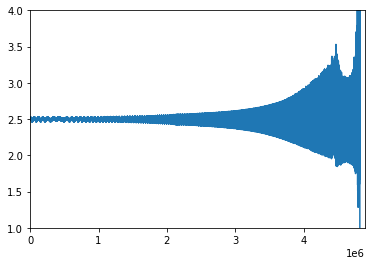

0.003850787421730898
3926.433965519354


In [16]:
plt.plot(time_list,a_list)
plt.ylim(1,4)
plt.xlim(0,4.9e6)
plt.show()
print(min(mars_distance_list))
print(max(mars_distance_list))
